In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import numpy as np

In [3]:
plt.rc('font', family='NanumBarunGothic')

#### 최종 데이터프레임 불러오기 (최종전연령대.pkl)

In [4]:
df = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종.pkl')
df

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,1147478.0,1567237.0,1434881.0,...,4.16,4.19,4.19,4.26,3.80,3.94,4.12,4.01,160474.0,7312582.8
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,236627.0,1009571.0,1255043.0,...,4.14,4.19,4.18,4.14,3.81,4.01,4.10,4.08,163526.0,1021987.9
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,91003.0,163857.0,260025.0,...,4.06,4.22,4.08,3.93,3.78,4.13,4.00,3.92,126167.0,1179949.5
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,143917.0,601522.0,747283.0,...,4.16,4.32,4.23,4.23,3.88,4.15,4.16,4.03,139689.0,1637981.3
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,481591.0,1122668.0,1345131.0,...,4.15,4.18,4.16,4.23,3.86,4.02,4.07,4.04,174524.0,5271753.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,264708.0,753039.0,655702.0,...,4.20,4.24,4.23,4.24,4.01,4.12,4.08,4.04,109573.0,1578259.0
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,56600.0,320735.0,256707.0,...,4.00,4.36,4.29,4.33,3.71,4.27,4.00,4.00,81672.0,110215.8
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,42046.0,75275.0,100083.0,...,3.86,4.07,4.04,4.29,3.93,3.97,4.13,4.03,71794.0,254616.7
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,796993.0,826937.0,812536.0,...,4.14,4.13,4.21,4.16,3.88,4.02,3.95,3.85,81015.0,986686.2


In [5]:
# 안쓰는 변수들 제거
# 연령대별 카드 이용건수 빼고 주말 이용건수만 써보자
df.drop(['카드_평일_이용건수','카드_여행사_이용건수','카드_20대_이용건수','카드_30대_이용건수','카드_40대_이용건수', '카드_50대_이용건수', '카드_60대_이용건수'], axis=1, inplace=True)

##### 결측치 처리

In [6]:
df[df['여행객수'].isnull() == True]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
66,경북 울주군,1,3.0,1.996,3.0,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.drop([66], axis=0, inplace=True)

In [8]:
# 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    12
카드_교통_이용건수      18
카드_숙박_이용건수       0
카드_체험_이용건수       0
카드_주말_이용건수       0
자연경관             0
문화유산             0
교통               0
숙박시설             1
식당및음식            0
쇼핑               0
관광지편의시설          0
관광종사자의친절성        0
체험프로그램           0
관광지물가            0
관광지혼잡도           0
재방문의도            0
타인추천의도           0
평균인당비용           0
여행객수             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      142 non-null    object 
 1   농촌마을_수        142 non-null    int64  
 2   농촌마을_체험_평균등급  142 non-null    float64
 3   농촌마을_교육_평균등급  142 non-null    float64
 4   농촌마을_숙박_평균등급  142 non-null    float64
 5   농촌마을_음식_평균등급  142 non-null    float64
 6   농촌마을_으뜸촌_선정수  142 non-null    int64  
 7   카드_관광쇼핑_이용건수  130 non-null    float64
 8   카드_교통_이용건수    124 non-null    float64
 9   카드_숙박_이용건수    142 non-null    float64
 10  카드_체험_이용건수    142 non-null    float64
 11  카드_주말_이용건수    142 non-null    float64
 12  자연경관          142 non-null    float64
 13  문화유산          142 non-null    float64
 14  교통            142 non-null    float64
 15  숙박시설          141 non-null    float64
 16  식당및음식         142 non-null    float64
 17  쇼핑            142 non-null    float64
 18  관광지편의시설       142 non-null    

In [10]:
# 이용건수는 0으로
df['카드_관광쇼핑_이용건수'] = df['카드_관광쇼핑_이용건수'].fillna(0)
df['카드_교통_이용건수'] = df['카드_교통_이용건수'].fillna(0)

In [11]:
# 만족도는 평균값으로
df['숙박시설'] = df['숙박시설'].fillna(df['숙박시설'].mean())
df['재방문의도'] = df['재방문의도'].fillna(df['재방문의도'].mean())

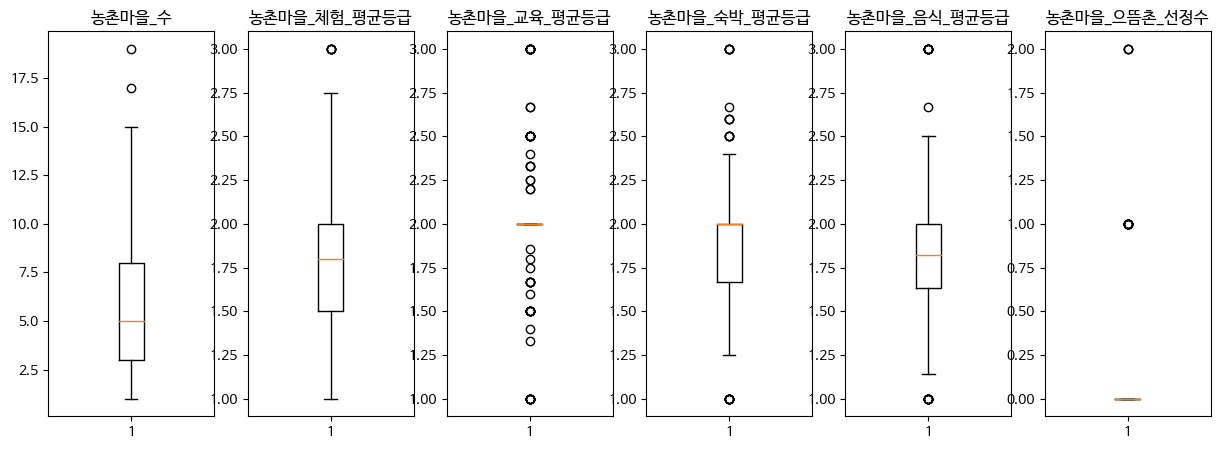

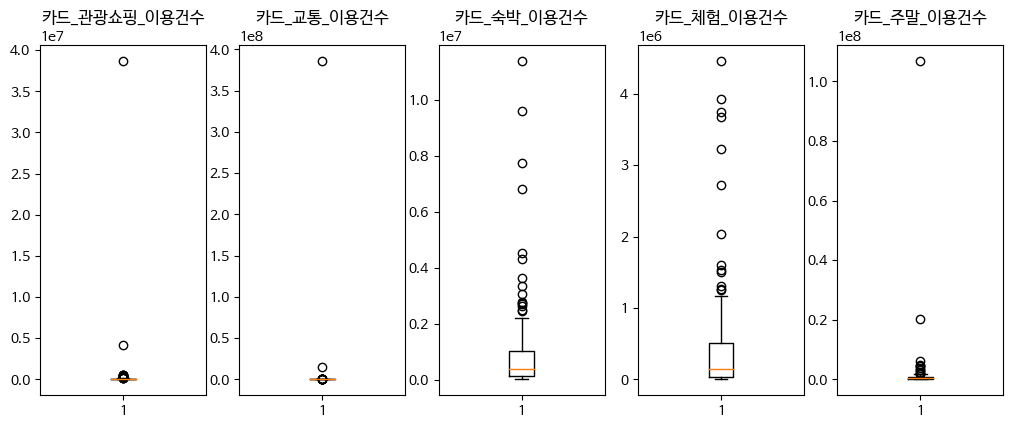

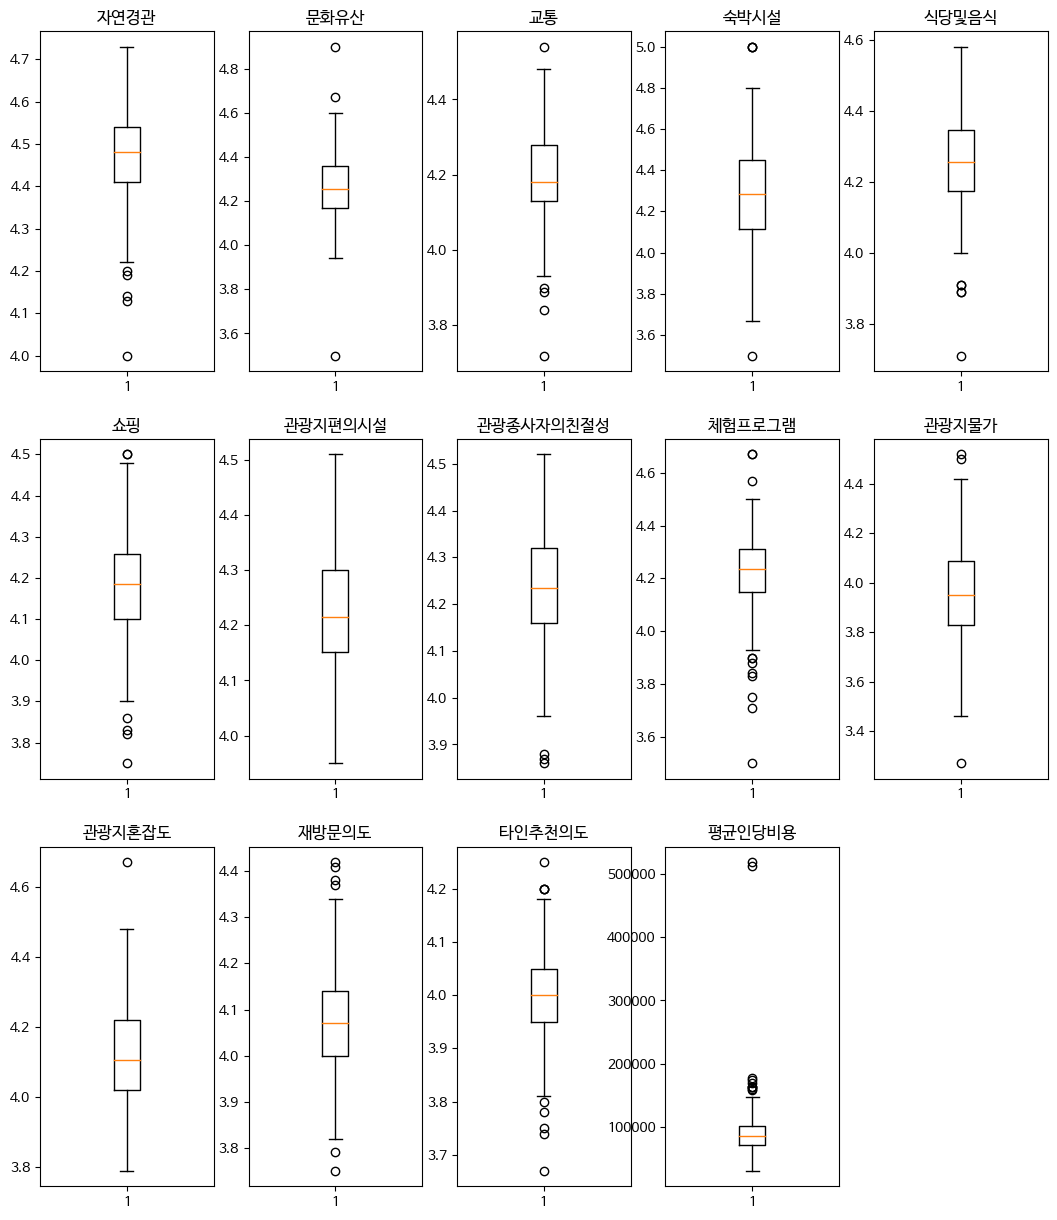

In [ ]:
# boxplot
# 변수별 단위 확인
plt.figure(figsize=(15,5))
for i in range(1,7):
  plt.subplot(1,6,i)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

plt.figure(figsize=(15,10))
for i in range(7,12):
  plt.subplot(2,6,i-6)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

plt.figure(figsize=(13,15))
for i in range(12,26):
  plt.subplot(3,5,i-11)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

In [ ]:
# 카드 이용 수와 평균인당 비용 단위가 크기 때문에 로그변환

##### 카드 관련 변수 로그 변환

In [12]:
# 카드 관련 변수 로그 변환
df_log = df.copy()
df_log.iloc[:, 7:12] = np.log1p(df_log.iloc[:, 7:12])
# 평균인당 비용 로그변환
df_log.iloc[:, -2] = np.log1p(df_log.iloc[:, -2])

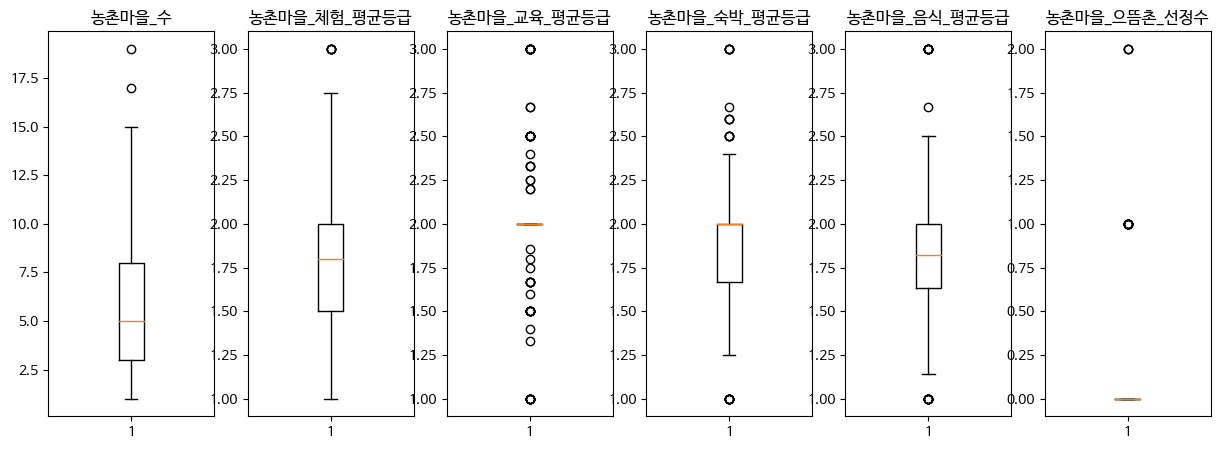

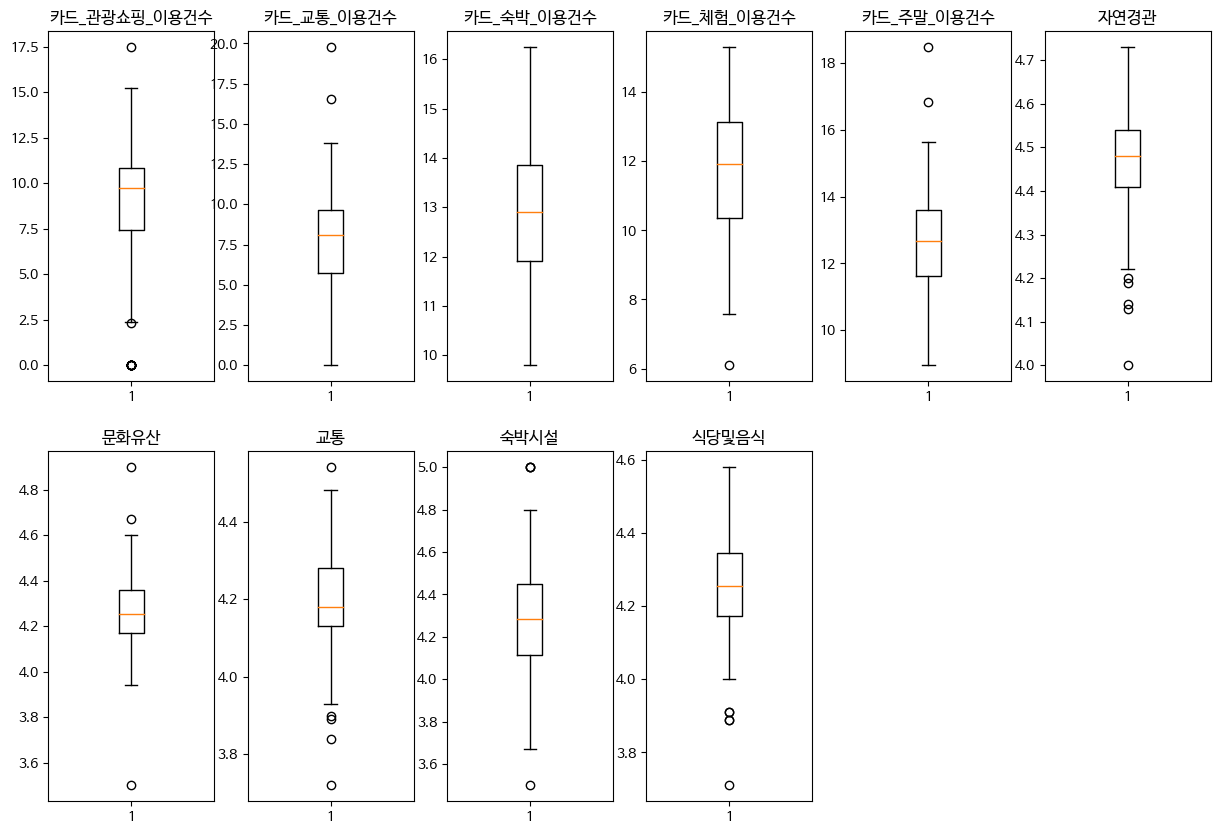

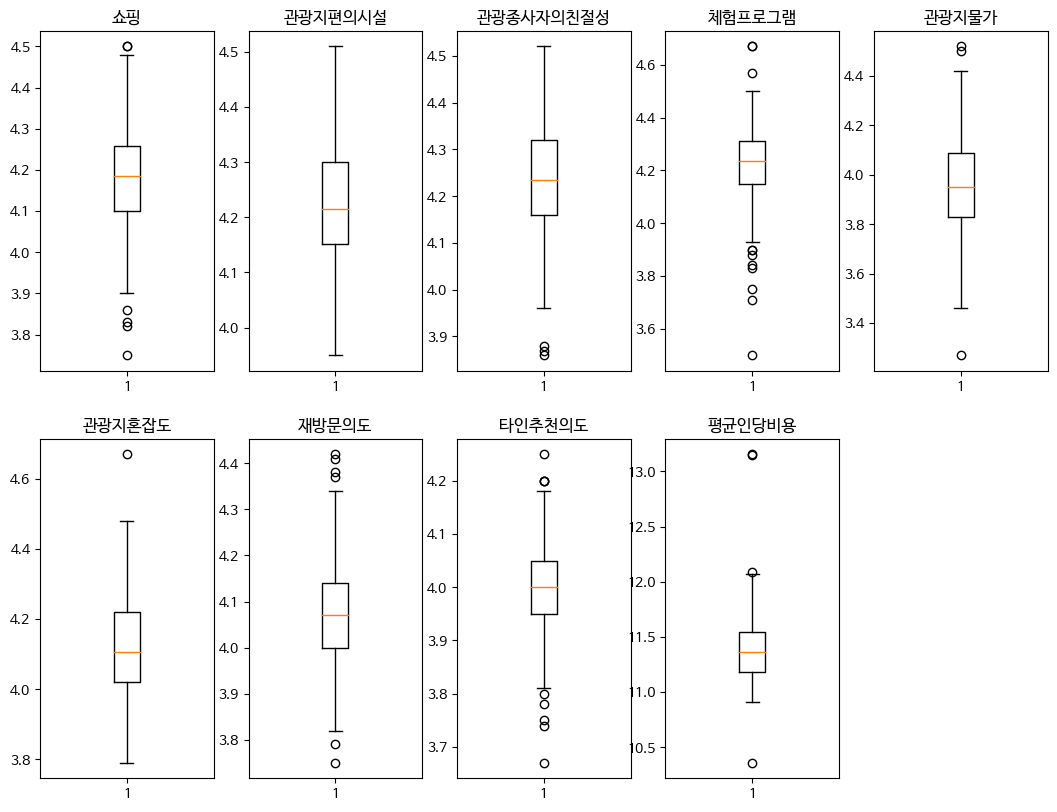

In [ ]:
# boxplot
# 변수별 단위 확인
plt.figure(figsize=(15,5))
for i in range(1,7):
  plt.subplot(1,6,i)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

plt.figure(figsize=(15,10))
for i in range(7,17):
  plt.subplot(2,6,i-6)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

plt.figure(figsize=(13,15))
for i in range(17,26):
  plt.subplot(3,5,i-16)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

### 클러스터링

#### T-SNE 2차원으로 축소

In [14]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# 변수 스케일링
scaler = StandardScaler()
df_scaled = df_log.copy()
df_scaled.iloc[:,1:-1] = scaler.fit_transform(df_scaled.iloc[:,1:-1])

In [15]:
tsne_np = TSNE(n_components = 2, random_state=10).fit_transform(df_scaled.iloc[:, 1:-1])

In [16]:
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,1.737357,-3.211728
1,1.594722,-1.467299
2,2.878261,-2.949145
3,-0.956878,-1.370644
4,1.394224,-2.237690
...,...,...
137,0.426576,-1.252207
138,-1.172407,1.717399
139,6.729666,1.326942
140,3.278602,-0.058443


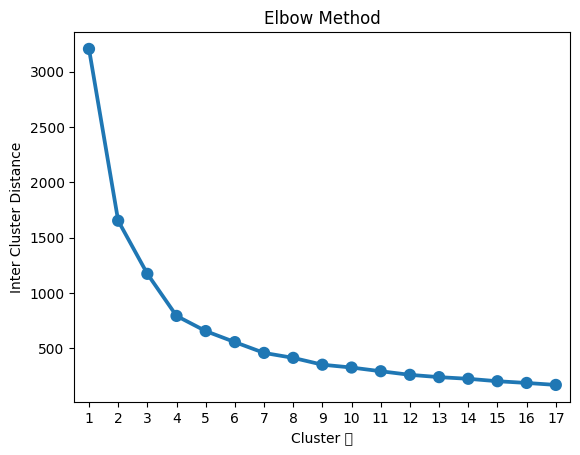

In [17]:
# Elbow method로 적정 클러스터 수 찾기
inertia = {}
for k in range(1,18):
    kmeans = KMeans(n_clusters = k, random_state=10).fit(tsne_df)
    inertia[k] = kmeans.inertia_
plt.title('Elbow Method')
plt.xlabel('Cluster 수')
plt.ylabel('Inter Cluster Distance')
sns.pointplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.show()

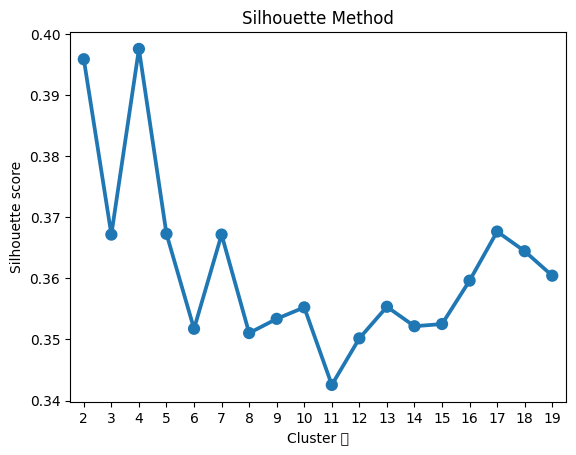

In [18]:
# 실루엣계수로 확인 (1에 가까울수록 군집화가 잘되는 것)
from sklearn.metrics import silhouette_score

score = {}
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=10).fit(tsne_df)
    labels = kmeans.labels_
    score[k] = silhouette_score(tsne_df, labels, metric='euclidean')

plt.title('Silhouette Method')
plt.xlabel('Cluster 수')
plt.ylabel('Silhouette score')
sns.pointplot(x=list(score.keys()), y=list(score.values()))
plt.show()

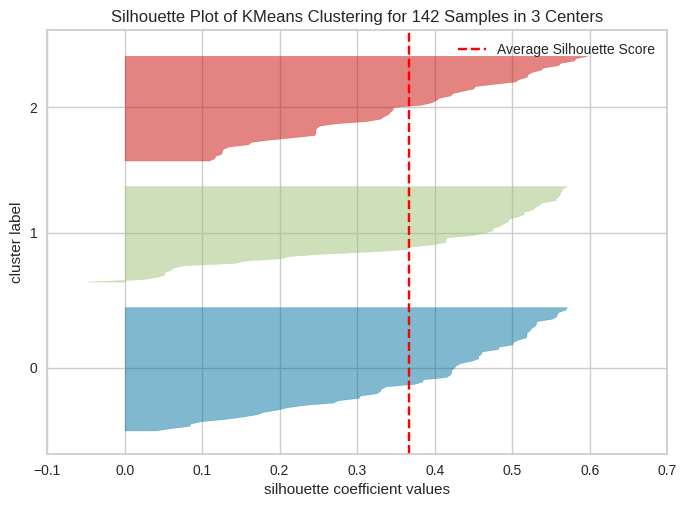

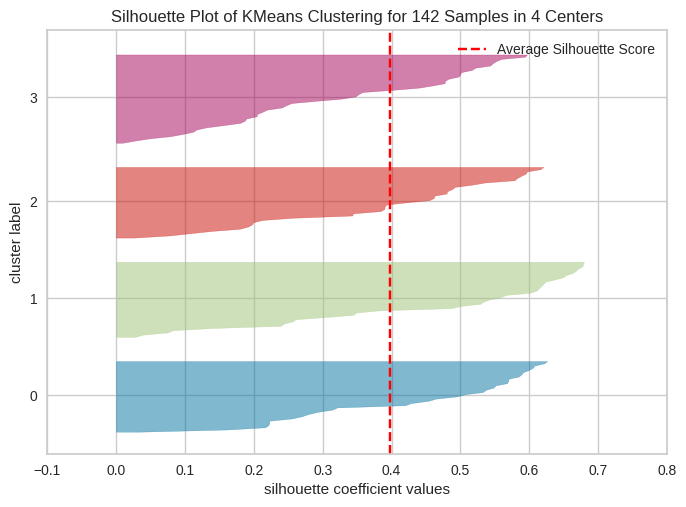

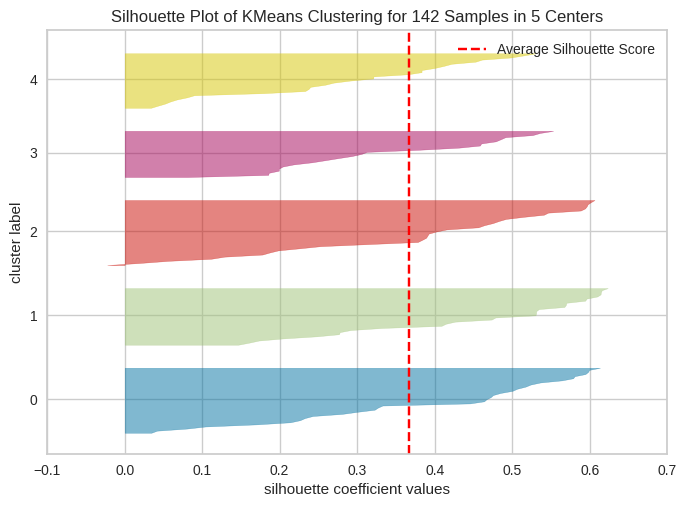

In [19]:
# 군집 개수별 실루엣 계수 확인
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(3,6):
  kmeans = KMeans(n_clusters=i, random_state=10)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(tsne_df)
  visualizer.show()

In [ ]:
# 4일 때가 실루엣 계수가 높으므로 선정

In [20]:
# 실루엣 변수 값
kmeans = KMeans(n_clusters=4, random_state=10)
kmeans_fit = kmeans.fit(tsne_df)
labels=kmeans_fit.labels_
centers=kmeans_fit.cluster_centers_
silhouette_score(tsne_df, labels, metric='euclidean')

0.39753056

In [21]:
df_kmeans = df_scaled.copy()
df_kmeans['cluster'] = labels

In [22]:
df_kmeans['cluster'].value_counts()

3    41
1    35
2    33
0    33
Name: cluster, dtype: int64

##### 결과 시각화

In [23]:
시군구 = gpd.read_file('/content/drive/MyDrive/문화관광 빅데이터 공모전/전처리/SIG_202302/sig.shp', encoding='cp949')

시군구_코드 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/전처리/시군구_코드_dict.pkl')

In [24]:
df_cluster_show = df_kmeans.copy()
df_cluster_show['관광지역_시군구_코드'] = df_cluster_show['관광지역_시군구'].apply(lambda x: 시군구_코드[x])
df_cluster_show = gpd.GeoDataFrame(pd.merge(df_cluster_show, 시군구, how='left', left_on='관광지역_시군구_코드', right_on='SIG_CD').drop(['SIG_CD', 'SIG_ENG_NM'],axis=1))

<Figure size 1500x2000 with 0 Axes>

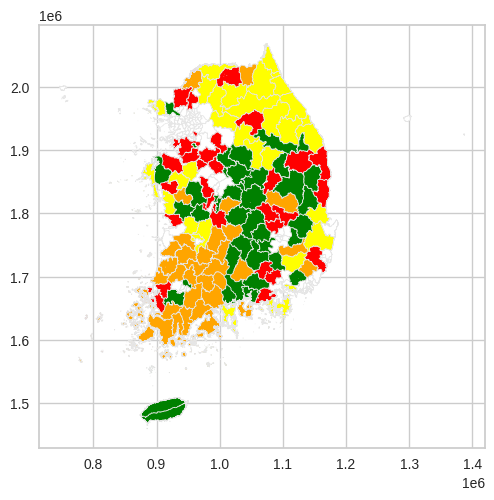

In [25]:
# 군집별 지도에 표시
plt.figure(figsize=(15, 20))
base = 시군구.plot(color='white',linewidth=0.5, edgecolor='0.9')
df_cluster_show[df_cluster_show['cluster'] == 0].plot(color='red',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 1].plot(color='orange',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 2].plot(color='yellow',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 3].plot(color='green',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 4].plot(color='blue',linewidth=0.5, edgecolor='0.9', ax=base)
plt.show()

In [26]:
plt.rc('font', family='NanumBarunGothic')

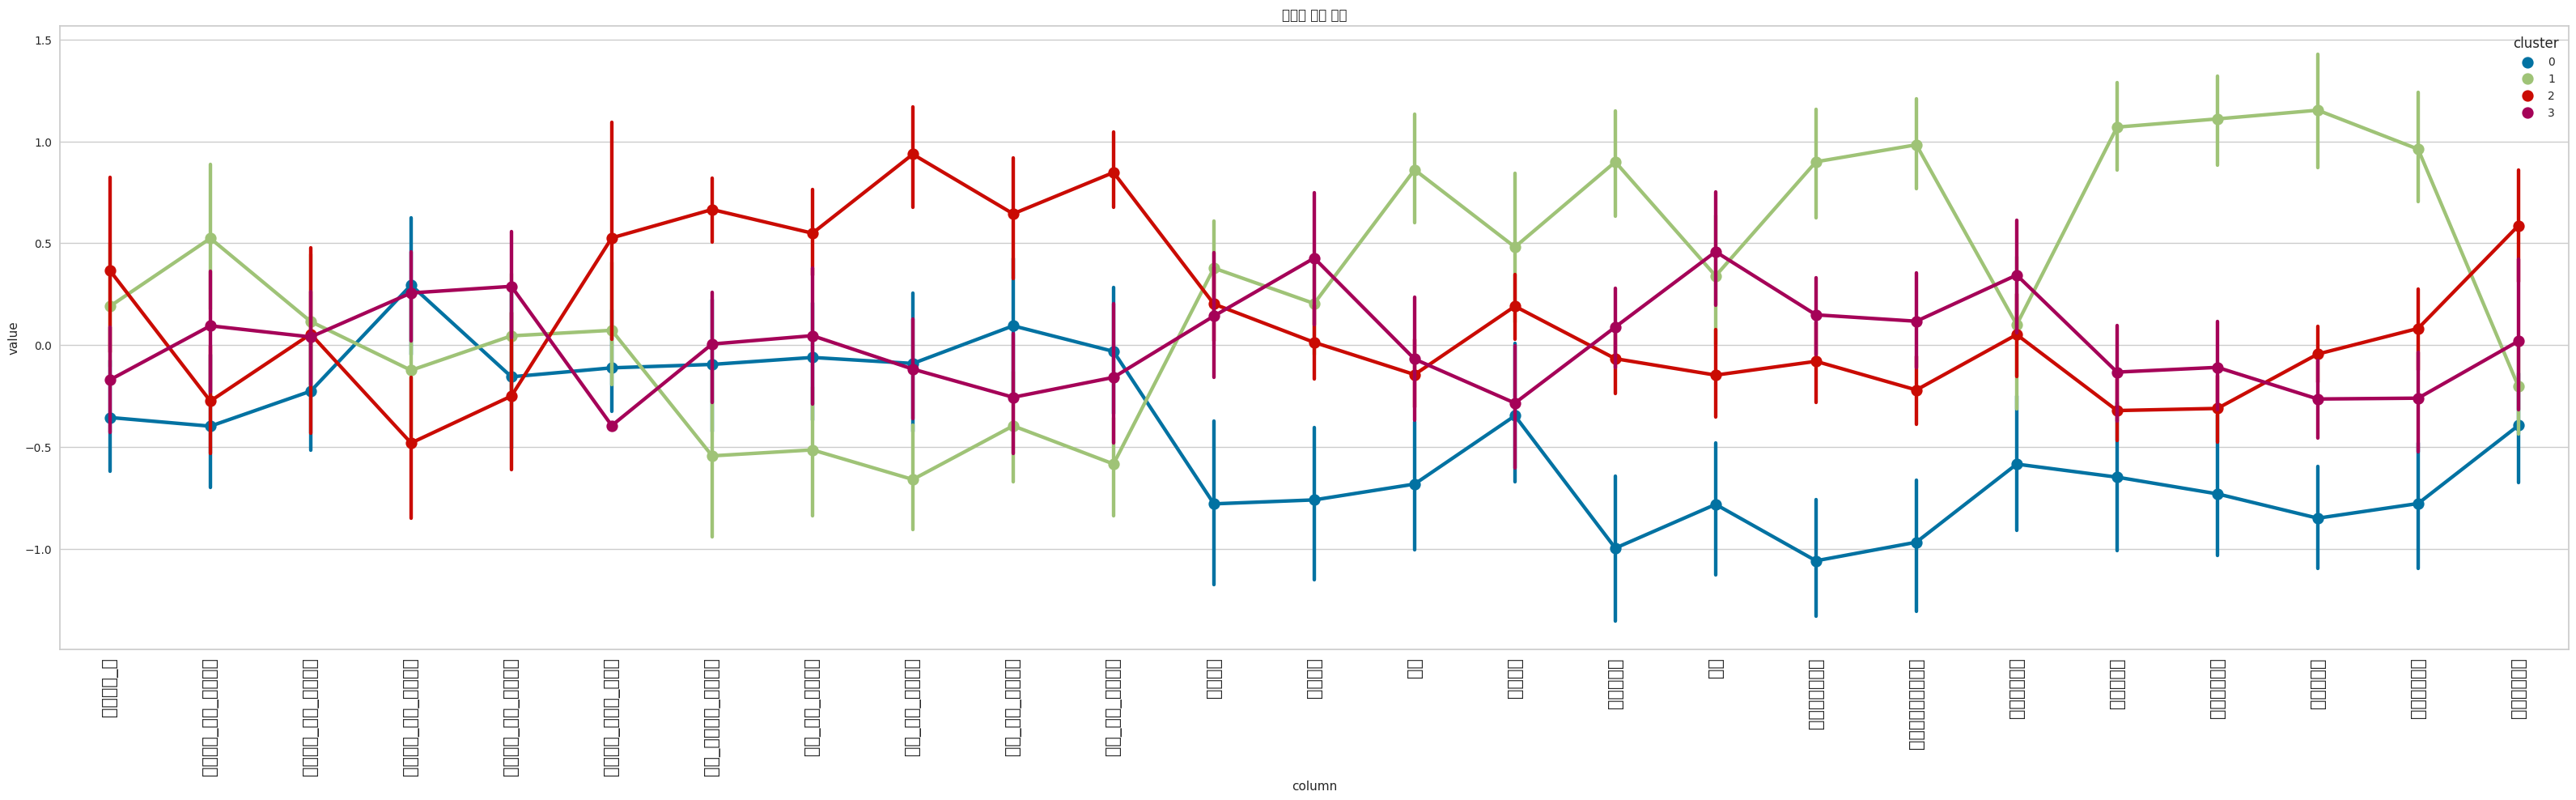

In [27]:
df_snake = df_cluster_show.drop(['관광지역_시군구_코드', 'SIG_KOR_NM', 'geometry'], axis=1)
plt.figure(figsize=(40, 10))
df_melt = pd.melt(df_snake.reset_index(), id_vars=['관광지역_시군구', 'cluster'], value_vars=df_snake.iloc[:,1:-2].columns, var_name='column', value_name='value')
sns.pointplot(data=df_melt, x='column', y='value', hue='cluster')
plt.xticks(rotation=90, fontsize=15)
plt.title("군집별 특성 파악")
plt.show()

In [28]:
df_mean = df_kmeans.groupby(['cluster']).mean()
df_mean

,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,카드_체험_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.355673,-0.398187,-0.226325,0.294325,-0.155898,-0.111834,-0.094968,-0.060772,-0.090330,0.094604,...,-0.782084,-1.059111,-0.967819,-0.584505,-0.648437,-0.730579,-0.849939,-0.777871,-0.394626,8.140689e+05
1,0.190549,0.523999,0.115665,-0.123847,0.045265,0.072492,-0.544006,-0.514510,-0.659954,-0.396622,...,0.339575,0.899888,0.983340,0.099741,1.070091,1.110419,1.153142,0.961822,-0.203983,8.833670e+05
2,0.365592,-0.275108,0.054091,-0.480834,-0.250275,0.526219,0.665578,0.549174,0.936879,0.644494,...,-0.147492,-0.079732,-0.220456,0.051488,-0.321503,-0.311096,-0.044102,0.081624,0.586810,2.678105e+06
3,-0.170648,0.094604,0.039889,0.255839,0.288279,-0.395413,0.005124,0.046112,-0.117994,-0.256304,...,0.458314,0.148433,0.116980,0.343870,-0.132809,-0.109497,-0.264796,-0.260674,0.019448,9.900214e+05


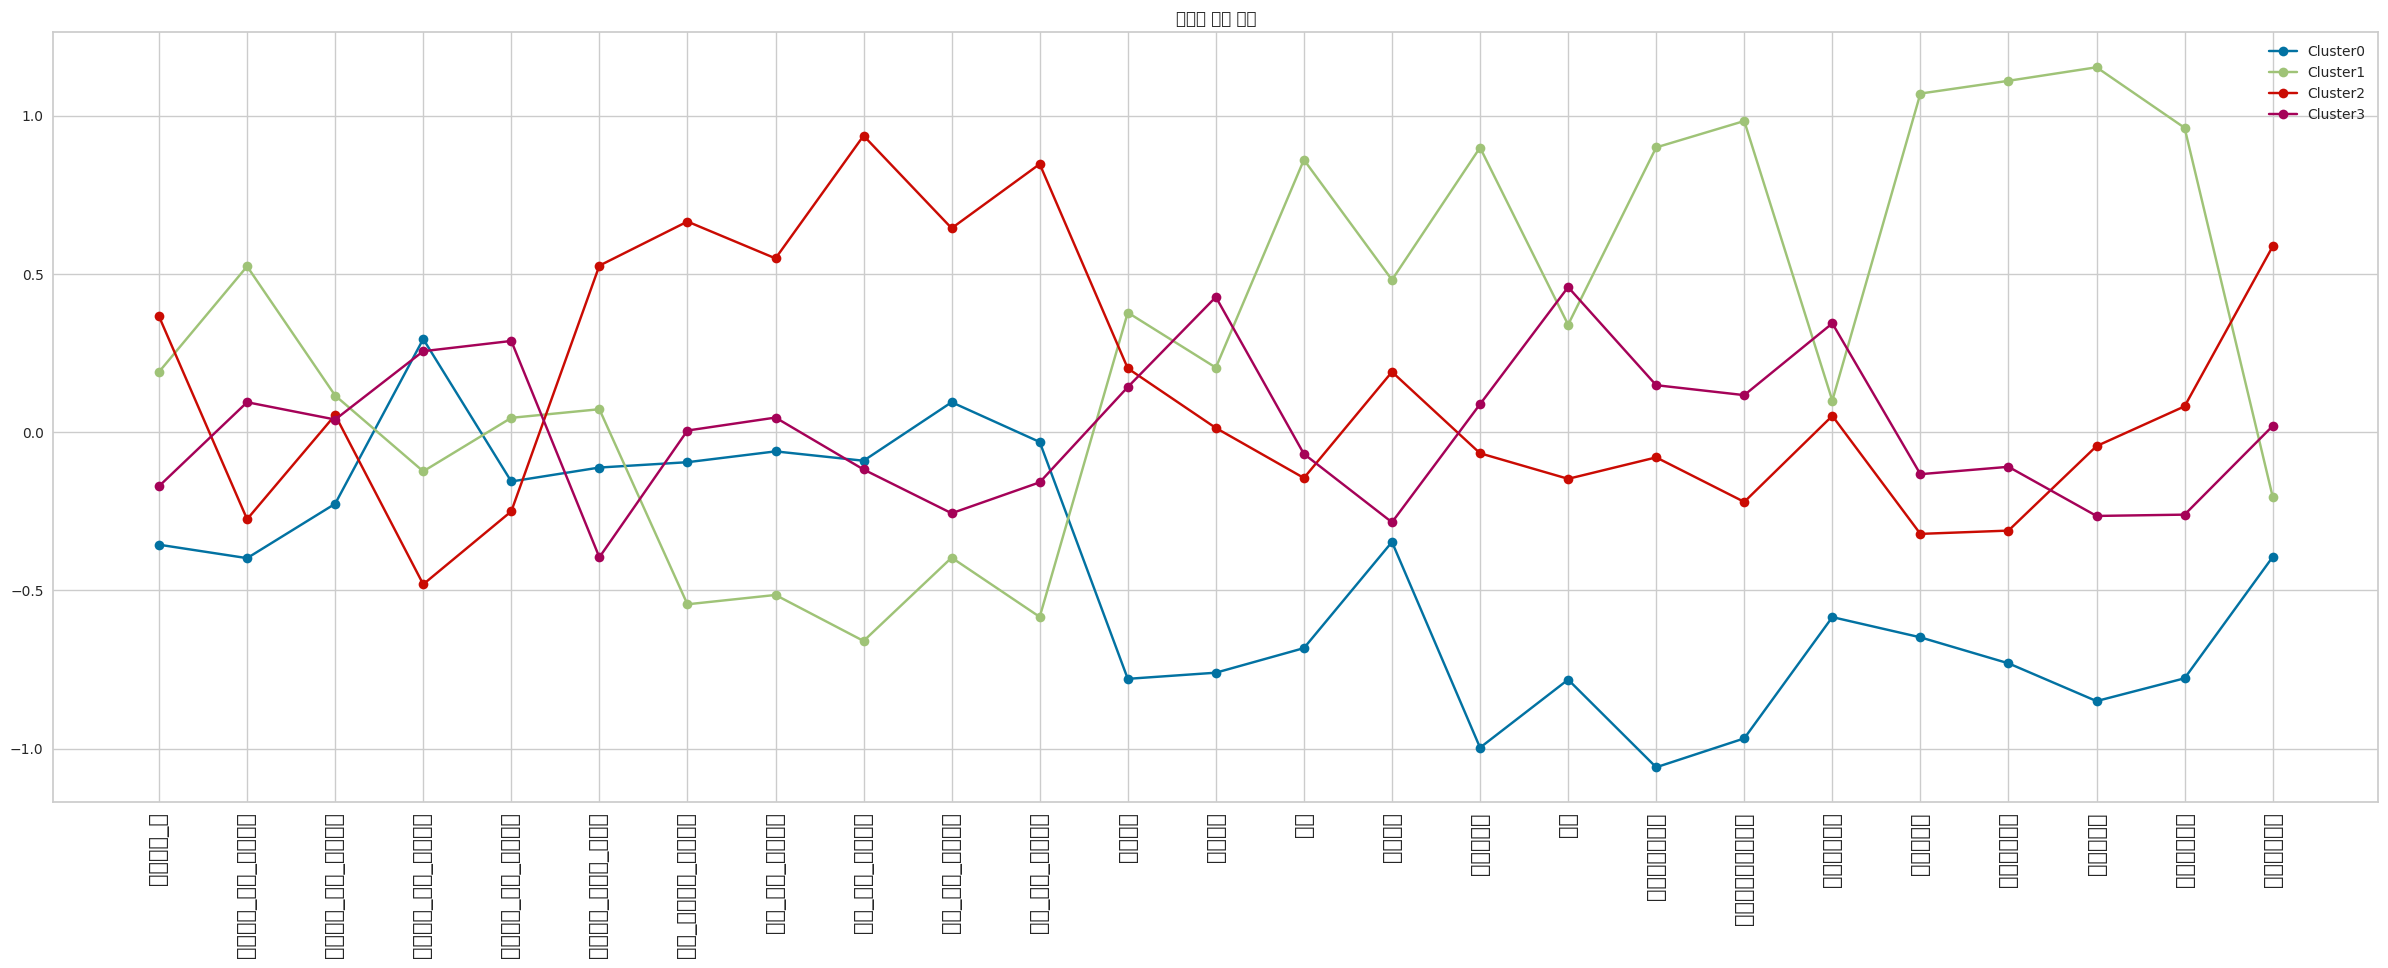

In [29]:
plt.figure(figsize=(30, 10))
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[0,:-1], 'o-', label = 'Cluster0')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[1,:-1], 'o-', label = 'Cluster1')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[2,:-1], 'o-', label = 'Cluster2')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[3,:-1], 'o-', label = 'Cluster3')
plt.xticks(rotation=90, fontsize=15)
plt.title("군집별 특성 파악")
plt.legend()
plt.show()

In [30]:
df_mean = df_kmeans.groupby(['cluster']).mean()
df_mean

,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,카드_체험_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.355673,-0.398187,-0.226325,0.294325,-0.155898,-0.111834,-0.094968,-0.060772,-0.090330,0.094604,...,-0.782084,-1.059111,-0.967819,-0.584505,-0.648437,-0.730579,-0.849939,-0.777871,-0.394626,8.140689e+05
1,0.190549,0.523999,0.115665,-0.123847,0.045265,0.072492,-0.544006,-0.514510,-0.659954,-0.396622,...,0.339575,0.899888,0.983340,0.099741,1.070091,1.110419,1.153142,0.961822,-0.203983,8.833670e+05
2,0.365592,-0.275108,0.054091,-0.480834,-0.250275,0.526219,0.665578,0.549174,0.936879,0.644494,...,-0.147492,-0.079732,-0.220456,0.051488,-0.321503,-0.311096,-0.044102,0.081624,0.586810,2.678105e+06
3,-0.170648,0.094604,0.039889,0.255839,0.288279,-0.395413,0.005124,0.046112,-0.117994,-0.256304,...,0.458314,0.148433,0.116980,0.343870,-0.132809,-0.109497,-0.264796,-0.260674,0.019448,9.900214e+05


##### 최종 데이터프레임에 클러스터 붙이기

In [2]:
import pandas as pd

In [5]:
df최종 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종.pkl')

In [6]:
df최종

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,1147478.0,1567237.0,1434881.0,...,4.16,4.19,4.19,4.26,3.80,3.94,4.12,4.01,160474.0,7312582.8
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,236627.0,1009571.0,1255043.0,...,4.14,4.19,4.18,4.14,3.81,4.01,4.10,4.08,163526.0,1021987.9
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,91003.0,163857.0,260025.0,...,4.06,4.22,4.08,3.93,3.78,4.13,4.00,3.92,126167.0,1179949.5
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,143917.0,601522.0,747283.0,...,4.16,4.32,4.23,4.23,3.88,4.15,4.16,4.03,139689.0,1637981.3
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,481591.0,1122668.0,1345131.0,...,4.15,4.18,4.16,4.23,3.86,4.02,4.07,4.04,174524.0,5271753.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,264708.0,753039.0,655702.0,...,4.20,4.24,4.23,4.24,4.01,4.12,4.08,4.04,109573.0,1578259.0
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,56600.0,320735.0,256707.0,...,4.00,4.36,4.29,4.33,3.71,4.27,4.00,4.00,81672.0,110215.8
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,42046.0,75275.0,100083.0,...,3.86,4.07,4.04,4.29,3.93,3.97,4.13,4.03,71794.0,254616.7
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,796993.0,826937.0,812536.0,...,4.14,4.13,4.21,4.16,3.88,4.02,3.95,3.85,81015.0,986686.2


In [32]:
df최종.drop([66], axis=0, inplace=True)

In [33]:
df최종['cluster'] = labels

In [34]:
df최종.to_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종클러스터링2.pkl')

In [35]:
df최종

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수,cluster
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,1147478.0,1567237.0,1434881.0,...,4.19,4.19,4.26,3.80,3.94,4.12,4.01,160474.0,7312582.8,2
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,236627.0,1009571.0,1255043.0,...,4.19,4.18,4.14,3.81,4.01,4.10,4.08,163526.0,1021987.9,2
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,91003.0,163857.0,260025.0,...,4.22,4.08,3.93,3.78,4.13,4.00,3.92,126167.0,1179949.5,2
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,143917.0,601522.0,747283.0,...,4.32,4.23,4.23,3.88,4.15,4.16,4.03,139689.0,1637981.3,2
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,481591.0,1122668.0,1345131.0,...,4.18,4.16,4.23,3.86,4.02,4.07,4.04,174524.0,5271753.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,264708.0,753039.0,655702.0,...,4.24,4.23,4.24,4.01,4.12,4.08,4.04,109573.0,1578259.0,2
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,56600.0,320735.0,256707.0,...,4.36,4.29,4.33,3.71,4.27,4.00,4.00,81672.0,110215.8,3
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,42046.0,75275.0,100083.0,...,4.07,4.04,4.29,3.93,3.97,4.13,4.03,71794.0,254616.7,0
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,796993.0,826937.0,812536.0,...,4.13,4.21,4.16,3.88,4.02,3.95,3.85,81015.0,986686.2,0


In [36]:
df최종[df최종['cluster'] == 3]['관광지역_시군구']

7       강원 영월군
13      강원 태백시
19      경기 김포시
23      경기 여주시
25      경기 오산시
33      경남 거창군
35      경남 김해시
38      경남 사천시
42      경남 진주시
43      경남 창녕군
46      경남 하동군
48      경남 함양군
49      경남 합천군
50      경북 경산시
52      경북 고령군
55      경북 김천시
56      경북 문경시
58      경북 상주시
59      경북 성주군
60      경북 안동시
62      경북 영양군
63      경북 영주시
64      경북 영천시
70      경북 청송군
73       광주 북구
74      대전 대덕구
75       대전 동구
84      전남 광양시
86      전남 나주시
115    제주 서귀포시
116     제주 제주시
118     충남 공주시
120     충남 논산시
123     충남 부여군
124     충남 서산시
132     충북 괴산군
134     충북 보은군
135     충북 영동군
137     충북 음성군
139     충북 증평군
142     충북 충주시
Name: 관광지역_시군구, dtype: object

In [ ]:
df

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수,cluster
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,512410.0,35587.0,4307834.0,...,4.19,4.19,4.26,3.80,3.94,4.12,4.01,160474.0,7312582.8,2
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,86367.0,209.0,3076538.0,...,4.19,4.18,4.14,3.81,4.01,4.10,4.08,163526.0,1021987.9,2
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,23638.0,32077.0,782379.0,...,4.22,4.08,3.93,3.78,4.13,4.00,3.92,126167.0,1179949.5,2
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,68602.0,3420.0,1996406.0,...,4.32,4.23,4.23,3.88,4.15,4.16,4.03,139689.0,1637981.3,2
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,121180.0,983893.0,2640282.0,...,4.18,4.16,4.23,3.86,4.02,4.07,4.04,174524.0,5271753.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,44337.0,2556.0,654268.0,...,4.24,4.23,4.24,4.01,4.12,4.08,4.04,109573.0,1578259.0,2
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,1660.0,3503.0,101510.0,...,4.36,4.29,4.33,3.71,4.27,4.00,4.00,81672.0,110215.8,3
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,1799.0,963.0,326770.0,...,4.07,4.04,4.29,3.93,3.97,4.13,4.03,71794.0,254616.7,0
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,127574.0,37415.0,2774910.0,...,4.13,4.21,4.16,3.88,4.02,3.95,3.85,81015.0,986686.2,0


In [ ]:
df_mean = df.groupby(['cluster']).mean()
df_mean

,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,카드_체험_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
cluster,,,,,,,,,,,,,,,,,,,,,
0,4.363636,1.660636,1.907909,2.024121,1.789333,0.121212,4.144606e+04,1.356227e+04,7.020333e+05,498793.636364,...,4.074848,4.103636,4.112727,4.118182,3.828788,4.012727,3.976364,3.923939,80813.939394,8.140689e+05
1,6.314286,2.071371,2.068857,1.846571,1.883571,0.200000,1.961991e+04,1.807683e+04,2.800825e+05,144414.400000,...,4.220000,4.314571,4.350857,4.234571,4.184000,4.296000,4.223429,4.092000,85615.085714,8.833670e+05
2,6.939394,1.715455,2.039879,1.695000,1.745121,0.393939,1.430189e+05,9.021933e+04,2.096804e+06,859349.272727,...,4.156970,4.209091,4.203939,4.226364,3.896364,4.077273,4.075758,4.006970,114475.606061,2.678105e+06
3,5.024390,1.880122,2.033195,2.007780,1.997415,0.000000,1.064905e+06,9.788343e+06,8.008577e+05,316627.365854,...,4.235366,4.233659,4.245122,4.276098,3.935366,4.108293,4.048537,3.973902,104886.073171,9.900214e+05


#### 클러스터별 연령대 여행객 평균 추가

In [ ]:
df20 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종20대.pkl')
df30 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종30대.pkl')
df40 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종40대.pkl')
df50 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종50대.pkl')
df60 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종60대.pkl')

In [ ]:
df20.drop([66], axis=0, inplace=True)
df30.drop([66], axis=0, inplace=True)
df40.drop([66], axis=0, inplace=True)
df50.drop([66], axis=0, inplace=True)
df60.drop([66], axis=0, inplace=True)

In [ ]:
df20['cluster'] = labels
df30['cluster'] = labels
df40['cluster'] = labels
df50['cluster'] = labels
df60['cluster'] = labels

In [ ]:
여행객수20 = pd.DataFrame(df20.groupby('cluster')['여행객수'].sum())
여행객수30 = pd.DataFrame(df30.groupby('cluster')['여행객수'].sum())
여행객수40 = pd.DataFrame(df40.groupby('cluster')['여행객수'].sum())
여행객수50 = pd.DataFrame(df50.groupby('cluster')['여행객수'].sum())
여행객수60 = pd.DataFrame(df60.groupby('cluster')['여행객수'].sum())

In [ ]:
여행객수20.columns = ['20대여행객수']
여행객수30.columns = ['30대여행객수']
여행객수40.columns = ['40대여행객수']
여행객수50.columns = ['50대여행객수']
여행객수60.columns = ['60대여행객수']

In [ ]:
연령대별여행객수 = pd.concat([여행객수20, 여행객수30, 여행객수40, 여행객수50, 여행객수60], axis = 1)

In [ ]:
df_all_mean = pd.concat([df_mean, 연령대별여행객수], axis = 1)
df_all_mean

,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,카드_체험_이용건수,...,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수,20대여행객수,30대여행객수,40대여행객수,50대여행객수,60대여행객수
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.355673,-0.398187,-0.226325,0.294325,-0.155898,-0.111834,-0.094968,-0.060772,-0.090330,0.094604,...,-0.730579,-0.849939,-0.777871,-0.394626,8.140689e+05,4845274.4,5301465.8,5213750.4,4986232.0,5622607.2
1,0.190549,0.523999,0.115665,-0.123847,0.045265,0.072492,-0.544006,-0.514510,-0.659954,-0.396622,...,1.110419,1.153142,0.961822,-0.203983,8.833670e+05,4489424.1,5069937.7,6561533.5,6895720.1,7073032.2
2,0.365592,-0.275108,0.054091,-0.480834,-0.250275,0.526219,0.665578,0.549174,0.936879,0.644494,...,-0.311096,-0.044102,0.081624,0.586810,2.678105e+06,16261589.9,18191420.5,18863155.6,17544920.4,15219401.9
3,-0.170648,0.094604,0.039889,0.255839,0.288279,-0.395413,0.005124,0.046112,-0.117994,-0.256304,...,-0.109497,-0.264796,-0.260674,0.019448,9.900214e+05,6075894.4,7048129.2,8148615.5,9688582.3,8642882.6


In [ ]:
df_all_mean.iloc[:, -5:].columns

Index(['20대여행객수', '30대여행객수', '40대여행객수', '50대여행객수', '60대여행객수'], dtype='object')

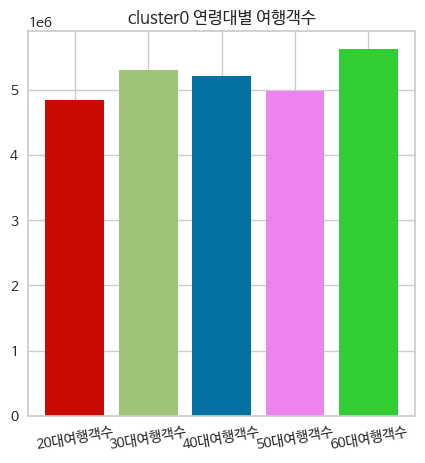

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(df_all_mean.iloc[:, -5:].columns, df_all_mean.iloc[0, -5:], color = ['r', 'g','b','violet','limegreen'])
plt.title('cluster0 연령대별 여행객수')
plt.xticks(rotation=10, fontsize=10)
plt.show()

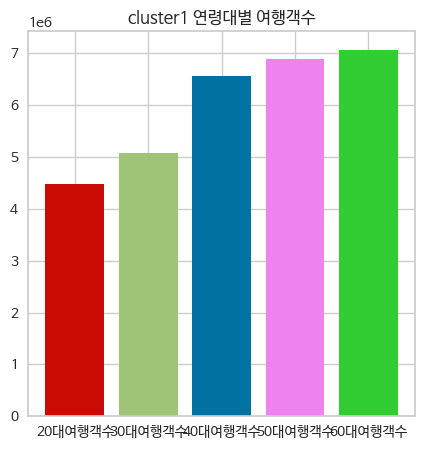

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(df_all_mean.iloc[:, -5:].columns, df_all_mean.iloc[1, -5:], color = ['r', 'g','b','violet','limegreen'])
plt.title('cluster1 연령대별 여행객수')
plt.show()

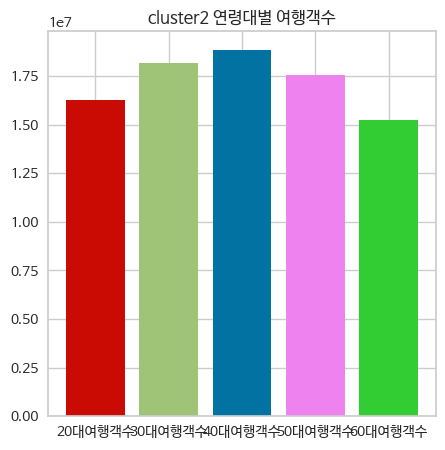

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(df_all_mean.iloc[:, -5:].columns, df_all_mean.iloc[2, -5:], color = ['r', 'g','b','violet','limegreen'])
plt.title('cluster2 연령대별 여행객수')
plt.show()

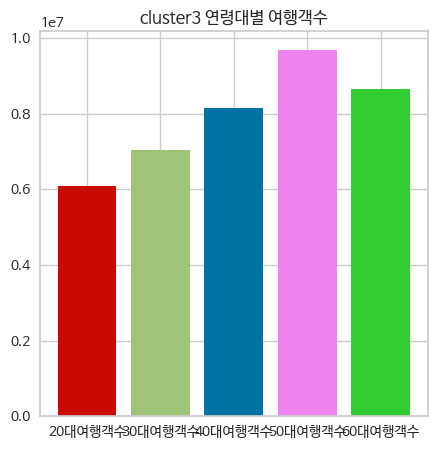

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(df_all_mean.iloc[:, -5:].columns, df_all_mean.iloc[3, -5:], color = ['r', 'g','b','violet','limegreen'])
plt.title('cluster3 연령대별 여행객수')
plt.show()

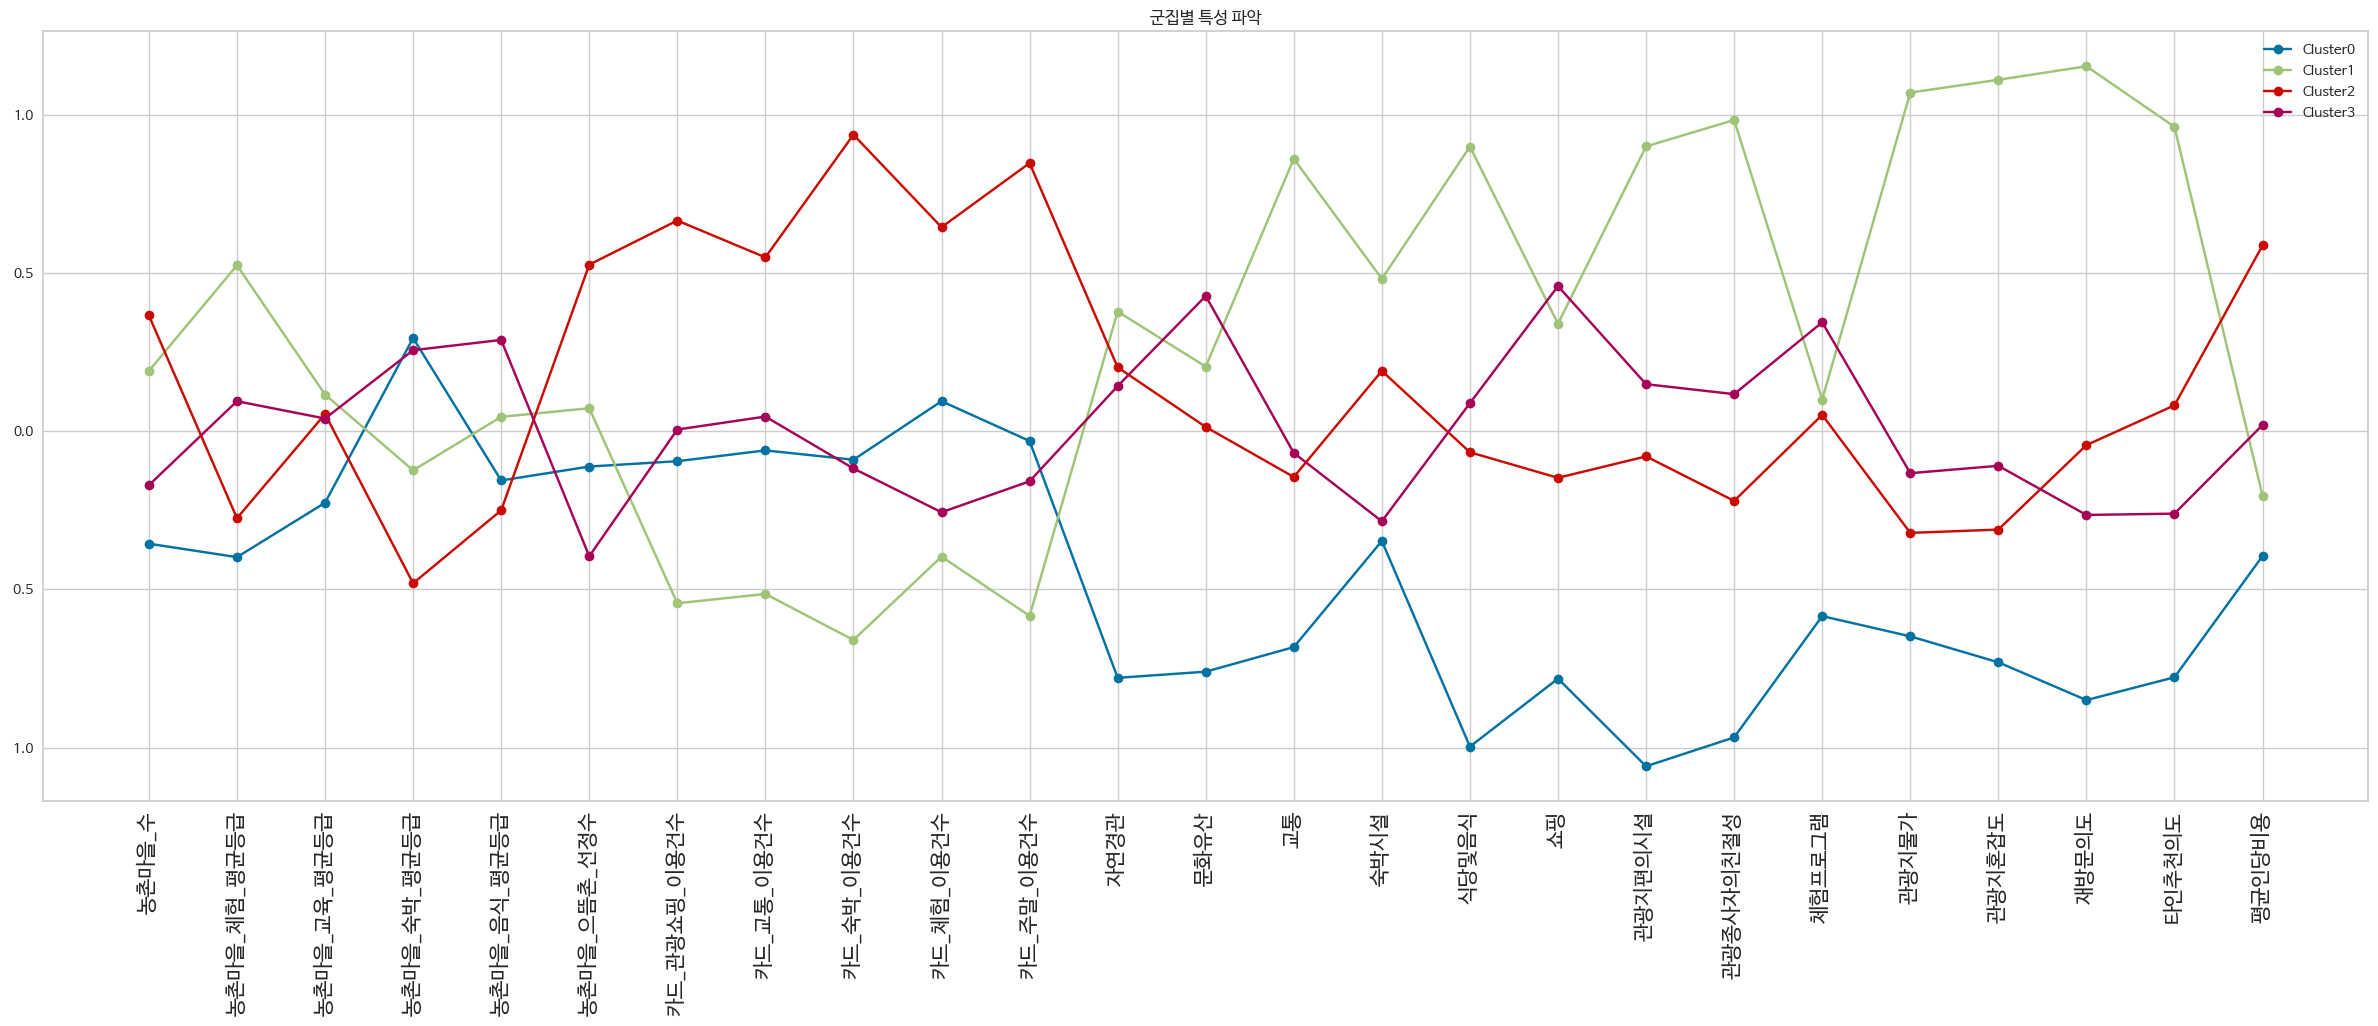

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[0,:-1], 'o-', label = 'Cluster0')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[1,:-1], 'o-', label = 'Cluster1')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[2,:-1], 'o-', label = 'Cluster2')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[3,:-1], 'o-', label = 'Cluster3')
plt.xticks(rotation=90, fontsize=15)
plt.title("군집별 특성 파악")
plt.legend()
plt.show()

##### T-SNE 시각화

In [ ]:
tsne_np = TSNE(n_components = 2, random_state=10).fit_transform(df_scaled.iloc[:, 1:-1])

In [ ]:
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,1.737357,-3.211728
1,1.594722,-1.467299
2,2.878261,-2.949145
3,-0.956878,-1.370644
4,1.394224,-2.237690
...,...,...
137,0.426576,-1.252207
138,-1.172407,1.717399
139,6.729666,1.326942
140,3.278602,-0.058443


In [ ]:
proj2d = tsne_df.copy()

In [ ]:
proj2d['cluster'] = labels

In [ ]:
# target 별 분리
proj2d_0 = proj2d[proj2d['cluster'] == 0]
proj2d_1 = proj2d[proj2d['cluster'] == 1]
proj2d_2 = proj2d[proj2d['cluster'] == 2]
proj2d_3 = proj2d[proj2d['cluster'] == 3]

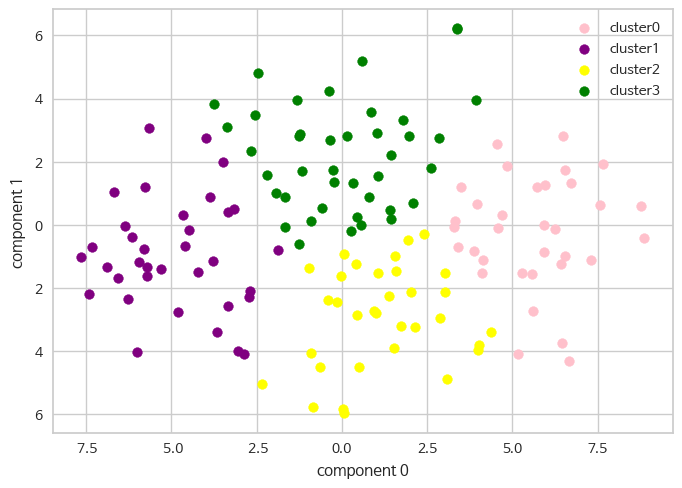

In [ ]:
plt.scatter(proj2d_0['component 0'], proj2d_0['component 1'], color = 'pink', label = 'cluster0')
plt.scatter(proj2d_1['component 0'], proj2d_1['component 1'], color = 'purple', label = 'cluster1')
plt.scatter(proj2d_2['component 0'], proj2d_2['component 1'], color = 'yellow', label = 'cluster2')
plt.scatter(proj2d_3['component 0'], proj2d_3['component 1'], color = 'green', label = 'cluster3')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()